## Loding Stable Diffusion Pipeline

In [1]:
import torch
from diffusers import StableDiffusionPipeline
from PIL import Image

# Load the Stable Diffusion model
model_id = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.to("cuda" if torch.cuda.is_available() else "cpu")  # Use GPU if available



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.31.0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "image_encoder": [
    null,
    null
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Genarting Image and Processing Image

In [5]:
prompt = "a serene sunset over a futuristic city"

for i in range(3):
    image = pipe(prompt).images[0]  
    filename = f"generated_image_{i+1}.png"
    image.save(filename) 
    print(f"Image {i+1} saved as {filename}")

  0%|          | 0/50 [00:00<?, ?it/s]

Image 1 saved as generated_image_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

Image 2 saved as generated_image_2.png


  0%|          | 0/50 [00:00<?, ?it/s]

Image 3 saved as generated_image_3.png


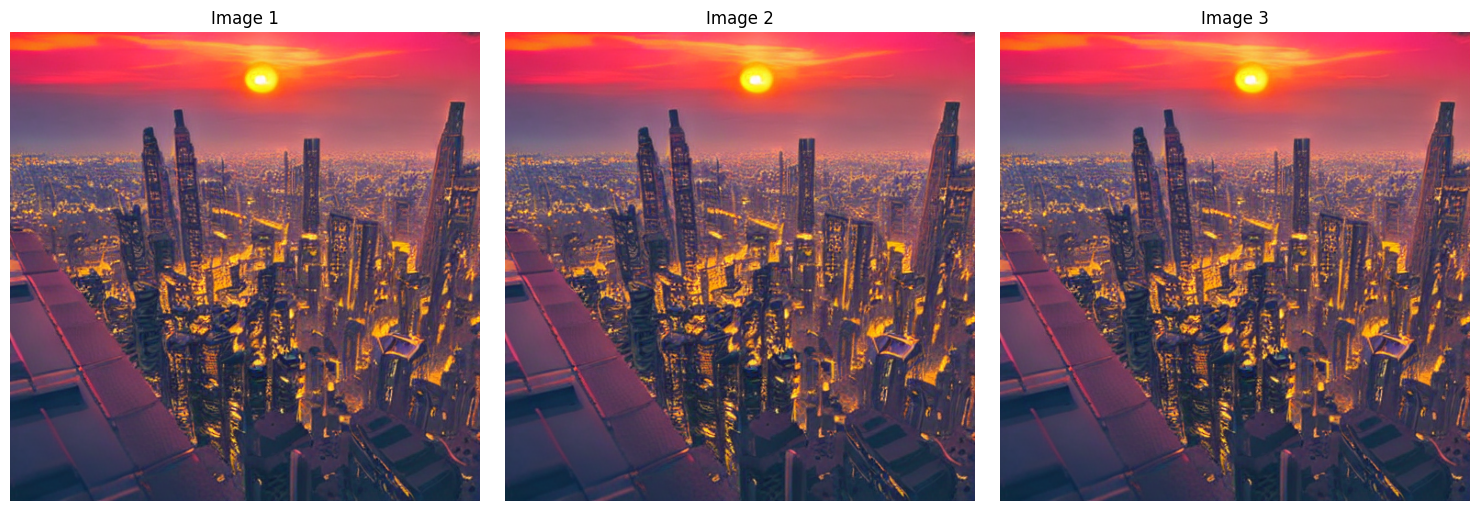

In [6]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    axes[i].imshow(image)
    axes[i].axis("off")
    axes[i].set_title(f"Image {i+1}")

# Show all images in a single figure
plt.tight_layout()
plt.show()

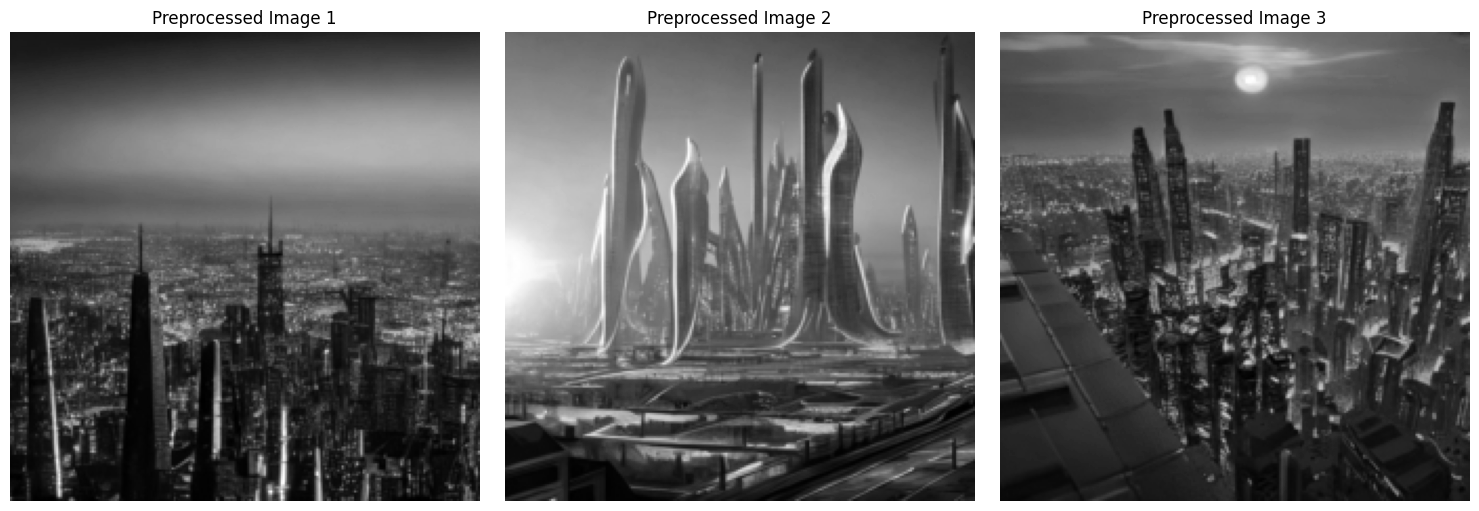

In [8]:
import torch
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import os

transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.Grayscale(num_output_channels=1), 
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.5], std=[0.5])  
])

preprocessed_images = []
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i in range(3):
    filename = f"generated_image_{i+1}.png"
    
    if os.path.exists(filename): 
        image = Image.open(filename) 
        processed_image = transform(image)  
        preprocessed_images.append(processed_image)
        
        image_to_show = processed_image.squeeze(0).numpy()  
        axes[i].imshow(image_to_show, cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f"Preprocessed Image {i+1}")

plt.tight_layout()
plt.show()
